<a href="https://colab.research.google.com/github/shand07/SPH_MLA5/blob/main/MachineLearningAssignmentTemplate_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Your Name**  

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [ ]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [9]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/MLA5_SPH/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/MLA5_SPH/landsat_test.csv')

### Statistical and Visual Exploration

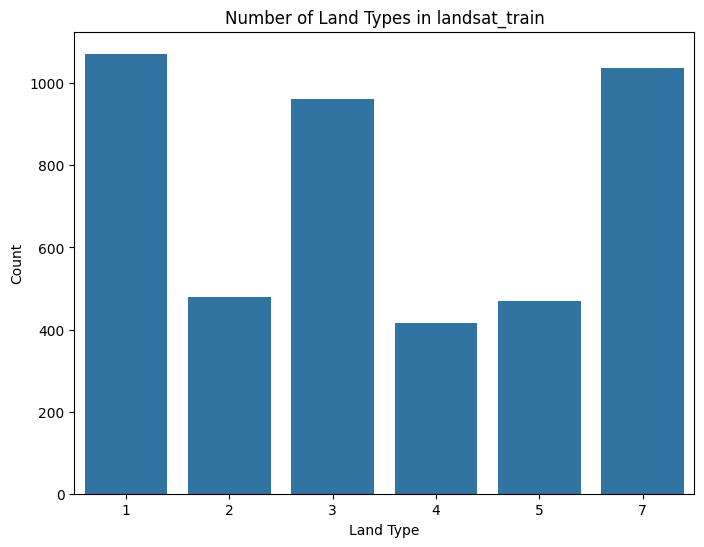

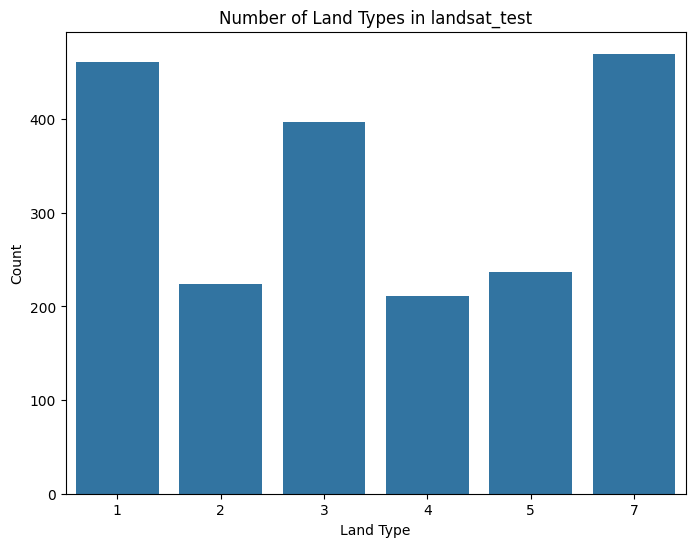

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='land_type', data=landsat_train)
plt.title('Number of Land Types in landsat_train')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='land_type', data=landsat_test)
plt.title('Number of Land Types in landsat_test')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

### Splitting Data into Train/Test

In [12]:
X_train = landsat_train.drop('land_type', axis=1)
X_test = landsat_test.drop('land_type', axis=1)
y_train = landsat_train['land_type']
y_test = landsat_test['land_type']

### Building the Pipeline

In [13]:
numerical_features = X_train.select_dtypes(include=np.number).columns
numerical_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier())])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

### Evaluating Model

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.98      0.97      0.98       224
           3       0.88      0.94      0.91       397
           4       0.76      0.64      0.69       211
           5       0.93      0.90      0.92       237
           7       0.87      0.89      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.91      0.91      0.91      2000



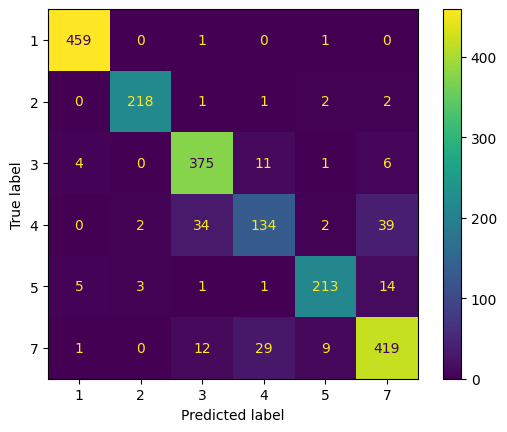

In [14]:
def classification_function(y_test, y_pred):
    print(classification_report(y_test, y_pred))

classification_function(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()

### Conclusion
Write a general conclusion about the results of your model.

In [ ]:
# The RandomForestClassifier demonstrates reasonable performance in predicting land type,
# as indicated by the classification report and confusion matrix.
# Further model tuning and exploration of other algorithms like Gradient Boosting or Support Vector Machines could potentially improve prediction accuracy,
# especially for minority classes.
# The significant class imbalance observed in the data might necessitate techniques such as oversampling or
# undersampling to further enhance the model's ability to distinguish between different land types.

## Problem 2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       0.97      0.99      0.98       461
           2       0.96      0.97      0.96       224
           3       0.87      0.95      0.91       397
           4       0.74      0.53      0.61       211
           5       0.90      0.85      0.87       237
           7       0.84      0.88      0.86       470

    accuracy                           0.89      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.89      0.89      0.89      2000



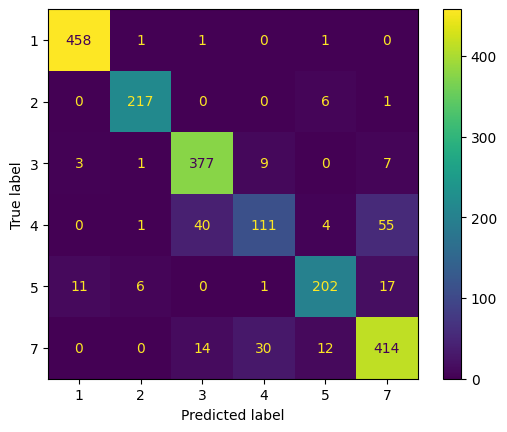

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = SVC(probability=True, random_state=1)


voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

y_pred_voting = voting_clf.predict(X_test)

classification_function(y_test, y_pred_voting)
ConfusionMatrixDisplay.from_estimator(voting_clf, X_test, y_test)
plt.show()

## Problem 3

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



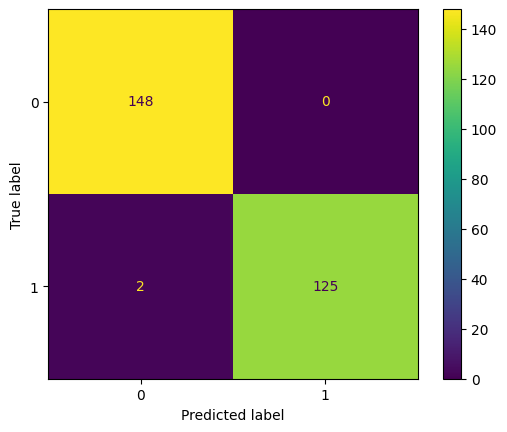

In [19]:
banknote_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/MLA5_SPH/banknote_authentication (2).csv')

X = banknote_data.drop('forgery', axis=1)
y = banknote_data['forgery']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_estimator(rf_classifier, X_test, y_test)
plt.show()

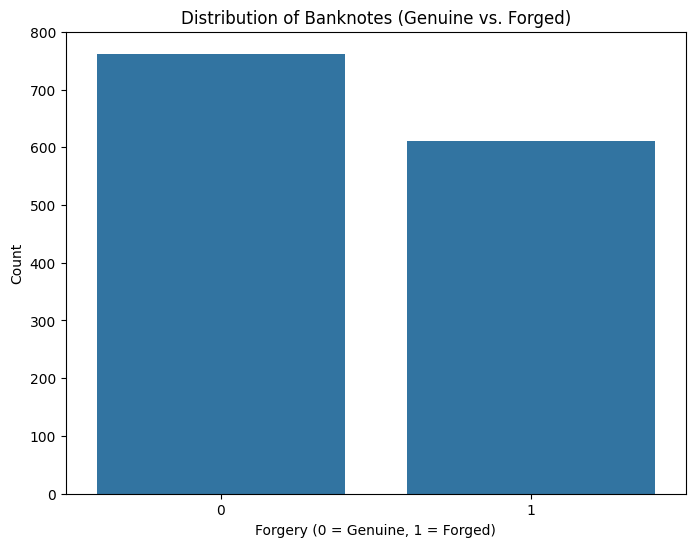

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='forgery', data=banknote_data)
plt.title('Distribution of Banknotes (Genuine vs. Forged)')
plt.xlabel('Forgery (0 = Genuine, 1 = Forged)')
plt.ylabel('Count')
plt.show()